In [1]:
#set up the env
import pkg_resources
import types
import platform
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix

%matplotlib inline

In [2]:
#read train and test data from files
df_train = pd.read_csv('train.csv', sep=';')
df_test = pd.read_csv('test.csv', sep=';')

In [3]:
#explote train data
df_train.head()

,Id,Bought_Product,Market_Segment,Online_Account,EnergyTariff,Sex,Age,Non_Energy_Product,How_many_other_contracts,Billing_Amount,District
0,262,0,3,0.0,G12,M,22.0,0,0,9.0000,DistrictA
1,263,0,2,0.0,C12,M,29.0,1,0,27.7208,DistrictA
2,264,0,3,0.0,G12,M,18.0,0,0,7.7958,DistrictD
3,265,0,3,1.0,G12,M,40.5,0,0,7.7500,DistrictD
4,266,0,3,1.0,G12,M,22.0,0,0,8.0500,DistrictA


In [4]:
#explore test data
df_test.head()

,Id,Market_Segment,Online_Account,EnergyTariff,Sex,Age,Non_Energy_Product,How_many_other_contracts,Billing_Amount,District
0,1,3,0.0,C12,F,32.0,1,1,15.50,DistrictE
1,2,3,NaN,G12,F,17.0,4,2,7.93,DistrictB
2,3,2,NaN,C12,F,17.0,0,0,12.00,DistrictB
3,4,3,NaN,G12,F,22.0,0,0,7.75,DistrictB
4,5,3,0.0,G12,M,45.0,0,0,8.05,DistrictD


In [5]:
#check if there are any missing values
print(df_train.info())
print('\n')
print(df_test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 626 entries, 0 to 625
Data columns (total 11 columns):
Id                          626 non-null int64
Bought_Product              626 non-null int64
Market_Segment              626 non-null int64
Online_Account              367 non-null float64
EnergyTariff                611 non-null object
Sex                         626 non-null object
Age                         616 non-null float64
Non_Energy_Product          626 non-null int64
How_many_other_contracts    626 non-null int64
Billing_Amount              618 non-null float64
District                    607 non-null object
dtypes: float64(3), int64(5), object(3)
memory usage: 53.9+ KB
None


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 261 entries, 0 to 260
Data columns (total 10 columns):
Id                          261 non-null int64
Market_Segment              261 non-null int64
Online_Account              157 non-null float64
EnergyTariff                255 non-null object
Sex

In [6]:
#explore statistics for numeric train data
df_train.describe()

,Id,Bought_Product,Market_Segment,Online_Account,Age,Non_Energy_Product,How_many_other_contracts,Billing_Amount
count,626.000000,626.000000,626.000000,367.000000,616.000000,626.000000,626.000000,618.000000
mean,574.500000,0.383387,2.313099,0.493188,29.783003,0.496805,0.364217,32.987291
std,180.854914,0.486600,0.822321,0.500636,14.943791,1.007566,0.782773,52.234536
min,262.000000,0.000000,1.000000,0.000000,0.670000,0.000000,0.000000,0.000000
25%,418.250000,0.000000,2.000000,0.000000,21.000000,0.000000,0.000000,7.903100
50%,574.500000,0.000000,3.000000,0.000000,28.000000,0.000000,0.000000,14.254150
75%,730.750000,1.000000,3.000000,1.000000,38.000000,1.000000,0.000000,30.923950
max,887.000000,1.000000,3.000000,1.000000,112.000000,8.000000,5.000000,512.329200


In [7]:
#explore statistics for numeric test data
df_test.describe()

,Id,Market_Segment,Online_Account,Age,Non_Energy_Product,How_many_other_contracts,Billing_Amount
count,261.00000,261.000000,157.000000,257.000000,261.000000,261.000000,261.000000
mean,131.00000,2.287356,0.439490,29.680311,0.593870,0.429119,30.470421
std,75.48841,0.871445,0.497913,15.490308,1.308185,0.863665,44.339654
min,1.00000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000
25%,66.00000,1.000000,0.000000,20.000000,0.000000,0.000000,7.900000
50%,131.00000,3.000000,0.000000,28.000000,0.000000,0.000000,15.000000
75%,196.00000,3.000000,1.000000,39.000000,1.000000,1.000000,31.390000
max,261.00000,3.000000,1.000000,114.000000,8.000000,6.000000,512.330000


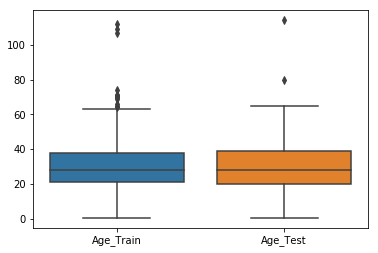

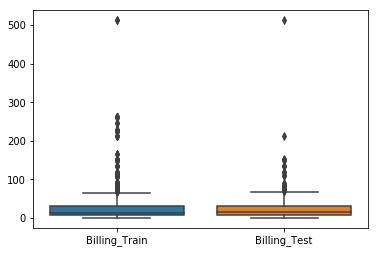

In [8]:
#values in two columns (Age and Billing_Amount)seem a bit suspicious, let's explote them further
data_boxplot = pd.concat([df_train['Age'], df_test['Age']], axis=1)
data_boxplot.columns = ['Age_Train', 'Age_Test']
sns.boxplot(data=data_boxplot, orient='v')
plt.show()

data_boxplot = pd.concat([df_train['Billing_Amount'], df_test['Billing_Amount']], axis=1)
data_boxplot.columns = ['Billing_Train', 'Billing_Test']
sns.boxplot(data=data_boxplot, orient='v')
plt.show()

In [9]:
'''now as we saw previously, columns:
Online_Account, EnergyTariff, Age, Billing_Amount and District
have missing values. Here I create a function to deal with it.'''
def deal_with_missing_values(df):
    #create empty df
    data_corrected = pd.DataFrame()
    
    #copy Market_Segment columnt, as there are no missing values
    data_corrected['Market_Segment'] = df['Market_Segment'].copy(deep=True)
    
    #get dummy variables for Online_Account
    data_corrected = pd.concat([data_corrected, pd.get_dummies(df['Online_Account'],
                    prefix='Online', dummy_na=True)],axis=1)
    
    #copy EnergyTariff column and replace missing values with highest frequency option
    data_corrected['EnergyTariff'] = df['EnergyTariff'].copy(deep=True)
    data_corrected.loc[pd.isna(data_corrected['EnergyTariff']), 'EnergyTariff'] \
                    = df['EnergyTariff'].value_counts().index[0]
    data_corrected = pd.concat([data_corrected, pd.get_dummies(data_corrected['EnergyTariff'],
                    prefix='EnergyTariff')],axis=1)
    data_corrected = data_corrected.drop(['EnergyTariff'], axis=1)
    
    #get dummy variables for Sex
    data_corrected = pd.concat([data_corrected, pd.get_dummies(df['Sex'],
                    prefix='Sex')],axis=1)   
    
    #copy Age column and replace missing values with mean value
    data_corrected['Age'] = df['Age'].copy(deep=True)
    data_corrected.loc[pd.isna(data_corrected['Age']),['Age']] = df['Age'].mean()
    
    #copy Non_Energy_Product column, as there are no missing values
    data_corrected['Non_Energy_Product'] = df['Non_Energy_Product'].copy(deep=True)
    
    #copy How_many_other_contracts column, as there are no missing values
    data_corrected['How_many_other_contracts'] = df['How_many_other_contracts'].copy(deep=True)
    
    #copy Billing_Amount column and replace missing values with median value
    data_corrected['Billing_Amount'] = df['Billing_Amount'].copy(deep=True)
    data_corrected.loc[pd.isna(data_corrected['Billing_Amount']),['Billing_Amount']] = df['Billing_Amount'].median()
    
    #copy District column and replace missing values with most highest frequency option
    data_corrected['District'] = df['District'].copy(deep=True)
    data_corrected.loc[pd.isna(data_corrected['District']), 'District'] \
                    = df['District'].value_counts().index[0]
    data_corrected = pd.concat([data_corrected, pd.get_dummies(data_corrected['District']
                    )],axis=1)
    data_corrected = data_corrected.drop(['District'], axis=1)
    
    return data_corrected

In [10]:
X = deal_with_missing_values(df_train)
y = df_train['Bought_Product']
data_w_labels_wo_nan = pd.concat([X, y], axis=1)

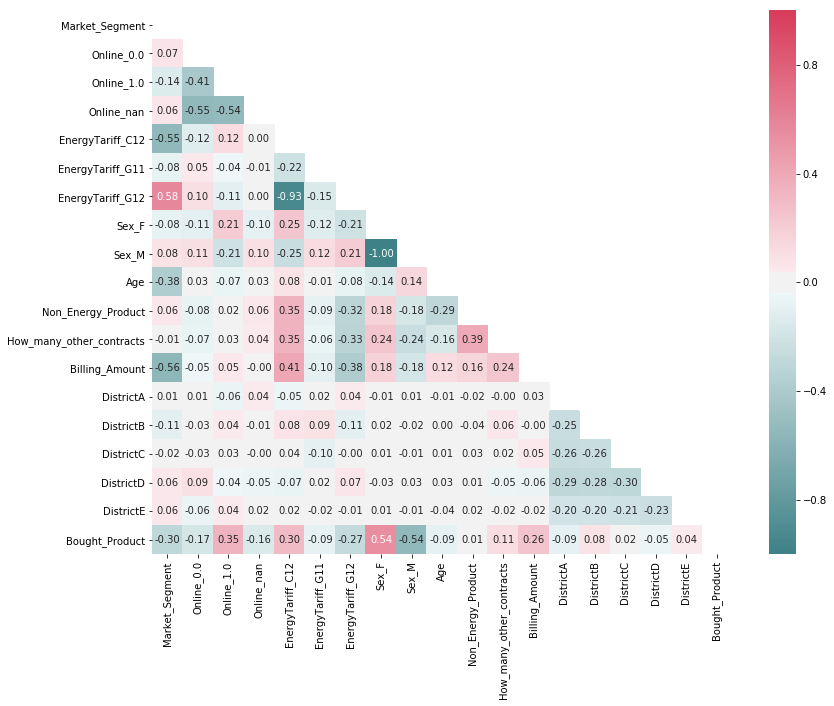

In [11]:
corr = (data_w_labels_wo_nan.corr(method='pearson'))
fig, ax = plt.subplots(figsize=(13,10))
mask = np.zeros_like(corr, dtype=np.bool)
cmap = sns.diverging_palette(200, 5, as_cmap=True)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corr, mask=mask, cmap=cmap, annot=True, fmt='.2f',
            xticklabels=data_w_labels_wo_nan.columns,
            yticklabels=data_w_labels_wo_nan.columns)
plt.show()

In [12]:
#percent of women which bought new product
print(data_w_labels_wo_nan.loc[data_w_labels_wo_nan['Sex_F']==1,'Bought_Product'].value_counts())
a, b = data_w_labels_wo_nan.loc[data_w_labels_wo_nan['Sex_F']==1,'Bought_Product'].value_counts()

print(a/(a+b)*100)

1    163
0     57
Name: Bought_Product, dtype: int64
74.0909090909091


In [13]:
#split train data into train and test subsets
X_train, X_test, y_train, y_test = train_test_split(X, y,
    random_state=87, stratify = y)

In [14]:
#perform hyperparameter optimisation using GridSearch for Logistic Regression
grid = {"C":np.linspace(4,5,101), "penalty":["l1","l2"]}# l1 lasso l2 ridge
lrc = LogisticRegression(solver='liblinear')
lrc_grid = GridSearchCV(lrc, grid, cv=10, verbose=1, n_jobs=-1)
lrc_grid.fit(X_train,y_train)

print("tuned hyperparameters :(best parameters) ",lrc_grid.best_params_)
print("accuracy :",lrc_grid.best_score_)

Fitting 10 folds for each of 202 candidates, totalling 2020 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 197 tasks      | elapsed:    2.2s


tuned hyperparameters :(best parameters)  {'C': 4.0, 'penalty': 'l2'}
accuracy : 0.8123667377398721


[Parallel(n_jobs=-1)]: Done 2020 out of 2020 | elapsed:    5.4s finished


In [15]:
#perform hyperparameter optimisation using GridSearch for Random Forest
rfc = RandomForestClassifier(random_state=0)
n_estimators = [int(x) for x in np.linspace(start = 50, stop = 500, num = 10)] #it has to be integer
max_features = ['log2', 'sqrt']
max_depth = [int(x) for x in np.linspace(10, 200, num = 20)] #it has to be integer
max_depth.append(None)
grid = {
 'n_estimators': n_estimators,
 'max_features': max_features,
 'max_depth': max_depth
 }
rfc_grid = GridSearchCV(estimator = rfc, 
            param_grid = grid, cv = 10, verbose=1, n_jobs = -1)
rfc_grid.fit(X_train, y_train)
print("tuned hyperparameters :(best parameters) ",rfc_grid.best_params_)
print("accuracy :",rfc_grid.best_score_)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 10 folds for each of 420 candidates, totalling 4200 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    2.1s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   16.7s
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:   36.9s
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 1242 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 1792 tasks      | elapsed:  2.6min
[Parallel(n_jobs=-1)]: Done 2442 tasks      | elapsed:  3.5min
[Parallel(n_jobs=-1)]: Done 3192 tasks      | elapsed:  4.6min
[Parallel(n_jobs=-1)]: Done 4042 tasks      | elapsed:  5.8min
[Parallel(n_jobs=-1)]: Done 4200 out of 4200 | elapsed:  6.1min finished


tuned hyperparameters :(best parameters)  {'max_depth': 10, 'max_features': 'log2', 'n_estimators': 200}
accuracy : 0.8230277185501066


In [16]:
#train Random Forest and Logistic Regression with hyperparameters tuned by grid search with CV
rfc = RandomForestClassifier(n_estimators = 200, random_state = 0, n_jobs = -1,
                                 max_depth = 10, max_features ='log2')
rfc.fit(X_train, y_train)
print(rfc.score(X_test, y_test))

lrc = LogisticRegression(C=4, penalty='l2', solver='liblinear')
lrc.fit(X_train, y_train)
print(lrc.score(X_test, y_test))

0.8535031847133758
0.8471337579617835


=== Confusion Matrix Random Forest===


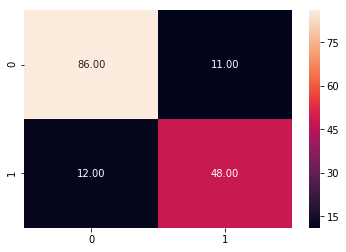

=== Confusion Matrix Logistic Regression===


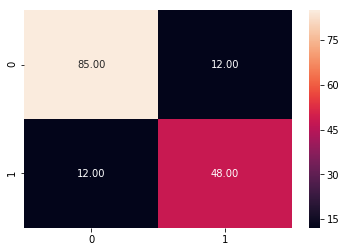

=== Confusion Matrix Combined===


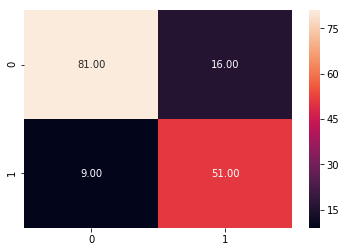

=== Classification Report Random Forest===
              precision    recall  f1-score   support

           0       0.88      0.89      0.88        97
           1       0.81      0.80      0.81        60

    accuracy                           0.85       157
   macro avg       0.85      0.84      0.84       157
weighted avg       0.85      0.85      0.85       157



=== Classification Report Logistic Regression===
              precision    recall  f1-score   support

           0       0.88      0.88      0.88        97
           1       0.80      0.80      0.80        60

    accuracy                           0.85       157
   macro avg       0.84      0.84      0.84       157
weighted avg       0.85      0.85      0.85       157



=== Classification Report Combined===
              precision    recall  f1-score   support

           0       0.90      0.84      0.87        97
           1       0.76      0.85      0.80        60

    accuracy                           0.84     

In [17]:
print("=== Confusion Matrix Random Forest===")
sns.heatmap(confusion_matrix(y_test, rfc.predict(X_test)),annot=True, fmt='.2f')
plt.show()
print("=== Confusion Matrix Logistic Regression===")            
sns.heatmap(confusion_matrix(y_test, lrc.predict(X_test)),annot=True, fmt='.2f')
plt.show()
print("=== Confusion Matrix Combined===")
sns.heatmap(confusion_matrix(y_test, (lrc.predict(X_test)|rfc.predict(X_test))),annot=True, fmt='.2f')
plt.show()

print("=== Classification Report Random Forest===")
print(classification_report(y_test, (rfc.predict(X_test))))
print('\n')

print("=== Classification Report Logistic Regression===")
print(classification_report(y_test, (lrc.predict(X_test))))
print('\n')

print("=== Classification Report Combined===")
print(classification_report(y_test, (lrc.predict(X_test)|rfc.predict(X_test))))
print('\n')

In [21]:
"""Save requirements.txt file with only packages used in this notebook (instead of the list of all
produced by pip freeze)"""
def get_imports():
    for name, val in globals().items():
        if isinstance(val, types.ModuleType):
            # Split ensures you get root package, 
            # not just imported function
            name = val.__name__.split(".")[0]

        elif isinstance(val, type):
            name = val.__module__.split(".")[0]

        poorly_named_packages = {
            "sklearn": "scikit-learn"
        }
        if name in poorly_named_packages.keys():
            name = poorly_named_packages[name]

        yield name
imports = list(set(get_imports()))

requirements = []
for m in pkg_resources.working_set:
    if m.project_name in imports and m.project_name!="pip":
        requirements.append((m.project_name, m.version))
        
f = open('requirements.txt','w')
f.write("{}=={}".format('Python',platform.python_version()))
f.write('\n')
print("{}=={}".format('Python',platform.python_version()))
for r in requirements:
    f.write("{}=={}".format(*r))
    f.write('\n')
    print("{}=={}".format(*r))
f.close()

Python==3.7.3
seaborn==0.9.0
scikit-learn==0.21.2
pandas==0.24.2
numpy==1.16.3
matplotlib==3.0.3
